<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/ARCH_GARCH_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 8.3 MB/s eta 0:00:00


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.614e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          1.43e-110
Time:                        19:44:35   Log-Likelihood:                -292.60
No. Observations:                 100   AIC:                             589.2
Df Residuals:                      98   BIC:                             594.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1359      0.905     10.094      0.0

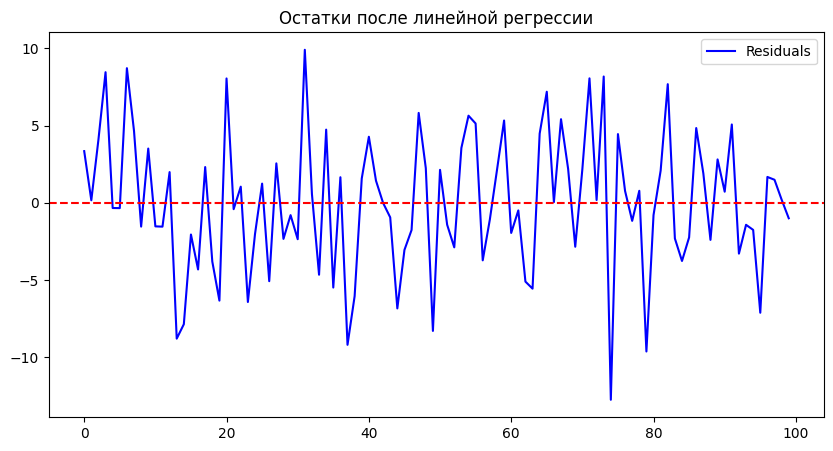

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt

# Генерируем искусственные данные (линейная зависимость + шум)
np.random.seed(42)
T = 100  # Количество точек
x = np.arange(T)
y = 2 * x + 10 + np.random.normal(0, 5, T)  # Линейная зависимость + шум

# Добавляем константу и строим линейную регрессию
X = sm.add_constant(x)  # Добавляем константу для регрессии
model = sm.OLS(y, X).fit()  # Оценка модели
print(model.summary())

# Получаем остатки (residuals)
residuals = model.resid

# Визуализируем остатки
plt.figure(figsize=(10,5))
plt.plot(residuals, label="Residuals", color='blue')
plt.axhline(0, linestyle="--", color="red")
plt.title("Остатки после линейной регрессии")
plt.legend()
plt.show()


In [ ]:
# ARCH(1) модель
arch_model_fit = arch_model(residuals, vol='ARCH', p=1).fit(disp='off')

# Выводим результаты
print(arch_model_fit.summary())


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -292.603
Distribution:                  Normal   AIC:                           591.207
Method:            Maximum Likelihood   BIC:                           599.022
                                        No. Observations:                  100
Date:                Thu, Mar 06 2025   Df Residuals:                       99
Time:                        19:43:38   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         1.8077e-06      0.460  3.927e-06      1.000 [ -0.902,  0.90

In [ ]:
# Делаем прогноз на 10 периодов вперёд
forecast = arch_model_fit.forecast(horizon=10)
print(forecast.variance[-1:])  # Будущая дисперсия


         h.01       h.02       h.03       h.04       h.05       h.06  \
99  20.372126  20.372126  20.372126  20.372126  20.372126  20.372126   

         h.07       h.08       h.09       h.10  
99  20.372126  20.372126  20.372126  20.372126  


In [ ]:
import statsmodels.api as sm

# Загрузка датасета
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData").data

# Просмотр первых 5 строк
print(duncan_prestige.head())


            type  income  education  prestige
rownames                                     
accountant  prof      62         86        82
pilot       prof      72         76        83
architect   prof      75         92        90
author      prof      55         90        76
chemist     prof      64         86        90


In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Зависимая переменная
y = duncan_prestige['income']

# Независимая переменная с добавлением константы
X = sm.add_constant(duncan_prestige['education'])

# Построение модели
model = sm.OLS(y, X).fit()

# Результаты модели
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           1.84e-08
Time:                        19:49:14   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.0

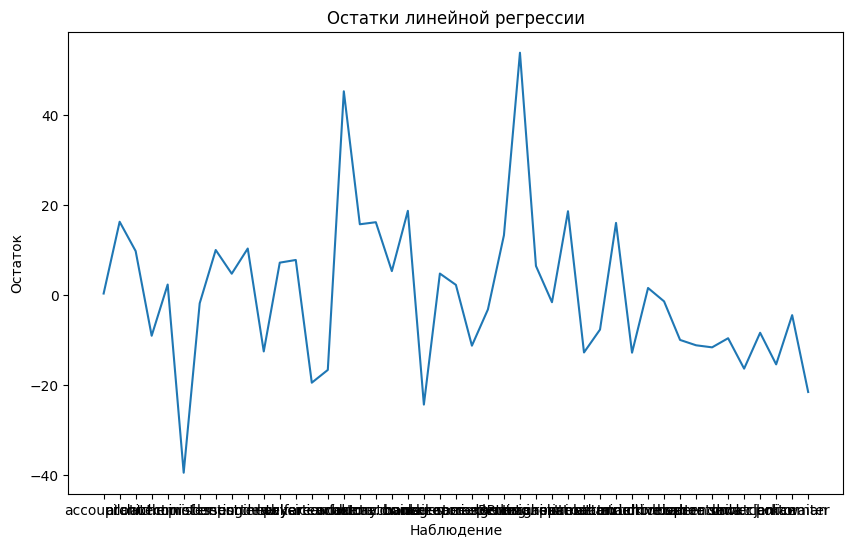

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -190.421
Distribution:                  Normal   AIC:                           386.843
Method:            Maximum Likelihood   BIC:                           392.263
                                        No. Observations:                   45
Date:                Thu, Mar 06 2025   Df Residuals:                       44
Time:                        19:49:33   Df Model:                            1
                                Mean Model                               
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -8.5832e-04      2.521 -3.405e-04      1.000 [ -4.941,  

In [ ]:
from arch import arch_model

# Остатки модели
residuals = model.resid

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Остатки линейной регрессии')
plt.xlabel('Наблюдение')
plt.ylabel('Остаток')
plt.show()

# Применение модели ARCH(1)
arch_model = arch_model(residuals, vol='ARCH', p=1)
arch_result = arch_model.fit(disp='off')

# Результаты модели ARCH
print(arch_result.summary())
